In [79]:
import pandas as pd

# usar o Pandas para ler a saída CSV em um DataFrame

In [103]:
dados = pd.read_csv("fremont.csv", index_col='Date', parse_dates=True)
dados.head()

,West,East
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [104]:
# 2. Verificar as colunas do CSV
print("Colunas originais:", dados.columns.tolist())

Colunas originais: ['West', 'East']


In [105]:
# 3. Renomear apenas se houver exatamente 2 colunas
if len(dados.columns) == 2:
    dados.columns = ["West", "East"]
    print("Colunas renomeadas:", dados.columns.tolist())
else:
    print("Número de colunas diferente de 2. Renomeação ignorada.")

Colunas renomeadas: ['West', 'East']


In [106]:
# 4. Garantir que as colunas sejam numéricas antes da soma
for col in ["West", "East"]:
    if col in dados.columns:
        dados[col] = pd.to_numeric(dados[col], errors='coerce')  # converte e coloca NaN se não for número


In [107]:
# 5. Criar a coluna 'Total' somente se as colunas existirem
if "West" in dados.columns and "East" in dados.columns:
    dados["Total"] = dados["West"] + dados["East"]

# 6. Mostrar as primeiras linhas
print(dados.head())

                     West  East  Total
Date                                  
2012-10-03 00:00:00   4.0   9.0   13.0
2012-10-03 01:00:00   4.0   6.0   10.0
2012-10-03 02:00:00   1.0   1.0    2.0
2012-10-03 03:00:00   2.0   3.0    5.0
2012-10-03 04:00:00   6.0   1.0    7.0


In [95]:
dados.dropna().describe()

,West,East,Total
count,45976.000000,45976.000000,45976.000000
mean,54.712306,55.479315,110.191622
std,72.935797,80.232055,139.189603
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,68.000000,144.000000
max,854.000000,717.000000,1165.000000


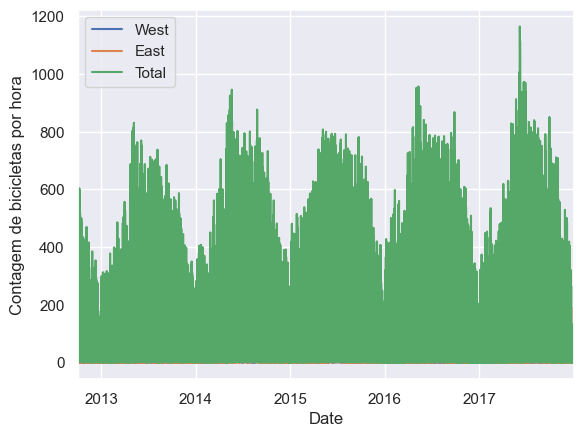

In [98]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
dados.plot()
plt.ylabel("Contagem de bicicletas por hora")
plt.show()

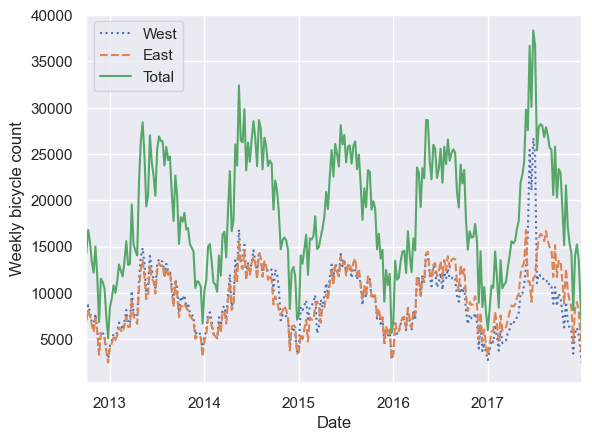

In [99]:
weekly = dados.resample("W").sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')
plt.show()

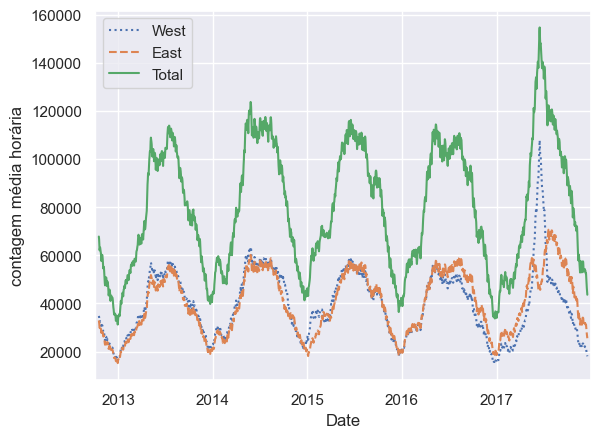

In [100]:
daily = dados.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('contagem média horária')
plt.show()

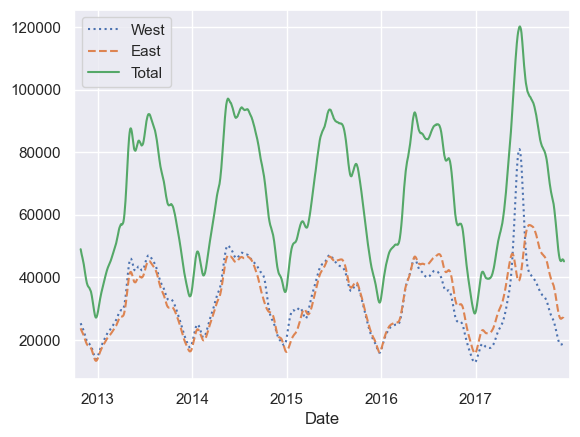

In [101]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':','--', '-'])
plt.show()

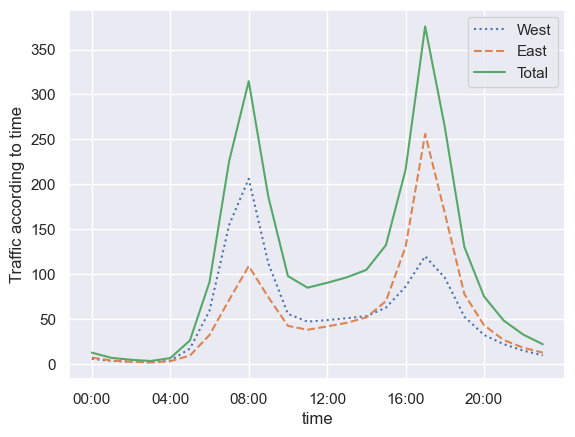

In [ ]:
import numpy as np
by_time = dados.groupby(dados.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks= hourly_ticks, style=[':', '--', '-'])
plt.ylabel("Traffic according to time")
plt.show()